# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ferhat Muhamad Yasin]
- **Email:** [Ferhatmuhamad221@gmail.com]
- **ID Dicoding:** [ferhat]

## Menentukan Pertanyaan Bisnis

- Pada Bulan Apa Penyewaan Sepeda Memiliki Jumlah Paling Tinggi Dalam Setahun?
- Kapan Jam Dengan Penyewaan Sepeda Paling Tinggi Dalam Sebulan?

## Import Semua Packages/Library yang Digunakan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [33]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data Pertama Merupakan Insight Untuk Memperoleh Hasil Peminjaman Sepeda Per-Hari
- Data Kedua Merupakan Insight Untuk Memperoelh Hasil Peminjaman Sepeda Per-Jam

### Assessing Data

In [35]:
day_assessment = {
    'Shape': day_df.shape,
    'Info': day_df.info(),
    'Missing Values': day_df.isnull().sum(),
    'Describe': day_df.describe(),
    'Duplicates': day_df.duplicated().sum()
}

hour_assessment = {
    'Shape': hour_df.shape,
    'Info': hour_df.info(),
    'Missing Values': hour_df.isnull().sum(),
    'Describe': hour_df.describe(),
    'Duplicates': hour_df.duplicated().sum()
}

(day_assessment, hour_assessment)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

({'Shape': (731, 16),
  'Info': None,
  'Missing Values': instant       0
  dteday        0
  season        0
  yr            0
  mnth          0
  holiday       0
  weekday       0
  workingday    0
  weathersit    0
  temp          0
  atemp         0
  hum           0
  windspeed     0
  casual        0
  registered    0
  cnt           0
  dtype: int64,
  'Describe':           instant      season          yr        mnth     holiday     weekday  \
  count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
  mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
  std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
  min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
  25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
  50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
  75%    548.500000    3.000000    1.000000   1

**Insight:**
- Pada analisis saya di dataset day.csv tidak ditemukan adanya keanehan seperti duplikasi data, missing value, serta pada describe untuk melihat kesesuaian data semuanya tidak ada keanehan. Hanya saja keanehan ada pada tipe dteday pada saat melakukan info() diperoleh jika dteday yang harusnya value tersebut tanggal menjadi object (untuk string)
- Pada analisis kedua saya di dataset hour.csv pun juga sama tidak ditemukan adanya keanehan seperti duplikasi data, missing value, serta pada describe untuk melihat kesesuaian data semuanya tidak ada keanehan. Untuk keanehan sendiri pun sama pada tipe dteday pada saat melakukan info() diperoleh jika dteday yang harusnya value tersebut tanggal menjadi object (untuk string)

### Cleaning Data

In [36]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_info = day_df.info()
hour_info = hour_df.info()

(day_info, hour_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None, None)

**Insight:**
- Pada proses cleaning data untuk dataset day.csv saya melakukan perbaikan kesalahan tipe data dteday dari object menjadi datetime
- Pada proses cleaning data untuk dataset hour.csv pun sama, saya melakukan perbaikan kesalahan tipe data dteday dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data hour.csv

In [37]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [38]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"]
})

instant casual                           registered                  \
        nunique    max min       mean        std        max min        mean   
weekday                                                                       
0          2502    317   0  56.163469  68.090663        526   0  121.305356   
1          2479    272   0  28.553449  35.097056        857   0  155.191206   
2          2453    178   0  23.580514  26.170895        871   0  167.658377   
3          2475    237   0  23.159192  27.790658        886   0  167.971313   
4          2471    154   0  24.872521  27.768088        885   0  171.564144   
5          2487    264   0  31.458786  36.487534        757   0  164.677121   
6          2512    367   0  61.246815  77.020582        491   0  128.962978   

                     
                std  
weekday              
0        105.972899  
1        159.517897  
2        170.103245  
3        172.344752  
4        169.327395  
5        149.905977  
6        108.600931

In [39]:
hourly_rentals=hour_df.groupby(by="hr")['cnt'].sum().sort_values(ascending=False).reset_index()
hourly_rentals.head(24)

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


In [40]:
weatherly_rentals=hour_df.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False).reset_index()
weatherly_rentals.head()

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


**Insight: day_df**
- Pada hour.csv setelah dilakukan group by weekday (hari kerja) ternyata dtemukan bahwa lebih banyak pengguna yang baru terdaftar (registered) daripada casul (pengguna biasa) hal ini bisa dilihat pada kolom mean, max dan std yang angka registered selalu diatas casual
- Insight kedua berdasarkan jam aktivitas (hr) ditemukan bahwa pengguna dengan sepeda terbanyak berada di jam 17, 18, 8, 16 dan 19 untuk 5 data terbanyak. Kesimpulannya dapat ditemukan bahwa logistik rental dengan sepeda terbanyak antara pukul 17-19 malam dan pukul 8 pagi
- Insight ketiga berdasarkan kondisi cuaca (weathersit) ditemukan bahwa angka rental sepeda terbanyak terjadi saat cuaca sedang cerah (clear)

**Explore Data day.csv**

In [41]:
seasonly_rentals=day_df.groupby(by="season")['cnt'].sum().sort_values(ascending=False).reset_index()
seasonly_rentals.head()

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


**Insight: day_df**
- Insight pertama berdasarkan season, rental sepeda dengan peminjaman terbanyak terjadi di season ketiga yaitu saat terjadi musim gugur dan diikuti dengan musim panas, musim semi dan musim dingin. Sehingga logistik harus dipersiapkan paling banyak di saat musim gugur

**Explore Data day.csv & hour.csv**

In [42]:
main_data_df=pd.concat([day_df, hour_df], axis=0, ignore_index=True)
main_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


In [43]:
monthly_rentals=main_data_df.groupby('mnth')['cnt'].sum().sort_values(ascending=False).reset_index()
monthly_rentals.head(12)

,mnth,cnt
0,8,702388
1,6,692684
2,9,691982
3,7,689896
4,5,663372
5,10,644704
6,4,538188
7,11,509662
8,3,457840
9,12,422072


In [44]:
working_day_rentals=main_data_df.groupby(['workingday','holiday'])['cnt'].sum().reset_index()
working_day_rentals.head()

,workingday,holiday,cnt
0,0,0,1843668
1,0,1,156870
2,1,0,4584820


In [45]:
hourly_main_data_rentals = main_data_df.groupby('hr')['cnt'].sum().reset_index()
hourly_main_data_rentals.head(24)

,hr,cnt
0,0.0,39130
1,1.0,24164
2,2.0,16352
3,3.0,8174
4,4.0,4428
5,5.0,14261
6,6.0,55132
7,7.0,154171
8,8.0,261001
9,9.0,159438


**Explore Data day.csv & hour.csv**
- Insight pertama berdasarkan bulan didapatkan bahwa angka tertinggi untuk rental sepeda berada di pertengahan tahun seperti bulan 5-9 dengan angka tertinggi pada bulan 8 (agustus) dan bulan 6 (juni)
- Insight kedua diperoleh bahwa hari kerja (workingday) menjadi angka tertinggi untuk rentals sepeda daripada hari libur (holiday)
- Insight ketiga didapatkan bahwa penyewaan rental sepeda berdasarkan jam selama sebulan berada di pukul 17 sore

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/var/folders/f1/7x_1j2995hg1q8mhn029_fs80000gn/T/ipykernel_39807/1537984750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=monthly_rentals, palette=colors)
/var/folders/f1/7x_1j2995hg1q8mhn029_fs80000gn/T/ipykernel_39807/1537984750.py:4: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='mnth', y='cnt', data=monthly_rentals, palette=colors)


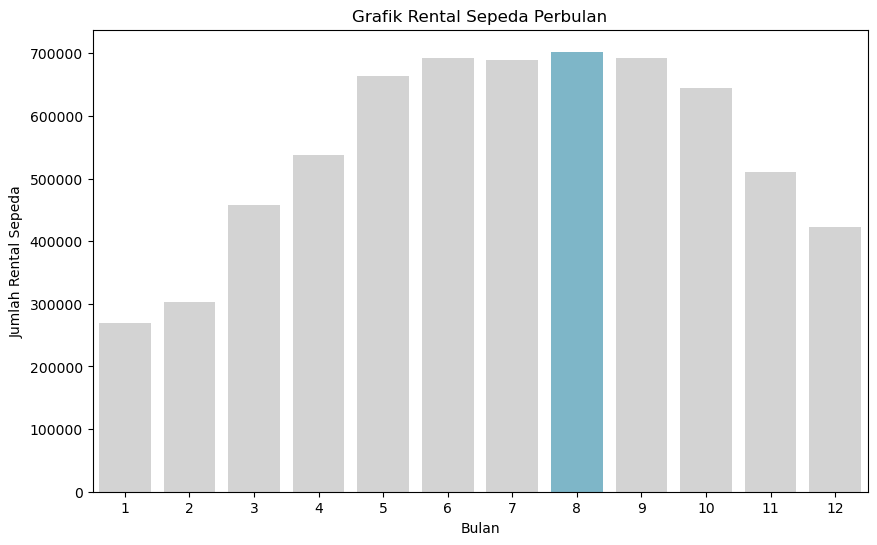

In [46]:
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

plt.figure(figsize=(10,6))
sns.barplot(x='mnth', y='cnt', data=monthly_rentals, palette=colors)
plt.title('Grafik Rental Sepeda Perbulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

### Pertanyaan 2:

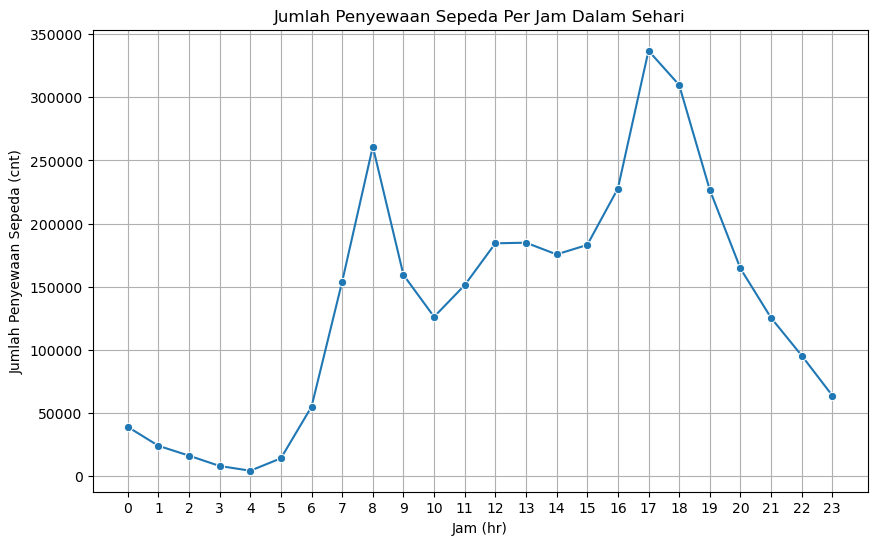

In [47]:
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt', data=hourly_main_data_rentals, marker='o')
plt.title('Jumlah Penyewaan Sepeda Per Jam Dalam Sehari')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(range(0, 24))  # Menampilkan jam dari 0 sampai 23
plt.grid(True)
plt.show()

**Insight:**
- Visualisasi data jumlah rental tertinggi dalam setahun berdasarkan bulan
- Visualisasi data jumlah rental tertinggi dalam sebulan berdasarkan waktu

## Analisis Lanjutan (Opsional)

**Explore Data day.csv & hour.csv**
- Untuk analisis lanjutan saya menggunakan Clustering tanpa menggunakan metode Machine Learning. Untuk metode yang saya gunakan adalah Manual Grouping

1. Berdasarkan pada pertanyaan pertama: Clustering Berdasarkan Bulan Dalam Setahun
2. Berdasarkan pada pertanyaan kedua: Clustering Berdasarkan Jam Dalam Sebulan

Penjelasan:
1. Clustering Berdasarkan Bulan dalam Setahun biasanya untuk mendapatkan Momen berdasarkan pergerakan aktivitas peminjaman sepeda, Cluster ini dapat dikategorikan menjadi beberapa cluster seperti berikut:
- Bulan deengan penyewaan sepeda tertinggi: Bulan yang memiliki penyewaan tertinggi berdasarkan nilai (cnt)
- Bulan dengan penyewaan sepeda sedang: Bulan yang memiliki penyewaan sepeda dengan nilai (cnt) setelah tertinggi dengan nilai tertentu
- Bulan dengan penyewaan sepeda terendah: Bulan yang memiliki penyewaan sepeda dengan nilai (cnt) terendah setelah menengah dengan nilai tertentu

2. Clustering Berdasarkan Jam dalam Sebulan biasanya untuk mendapatkan Customer Behavior (Pola Perilaku Customer) berdasarkan aktivitas harian, Cluster ini dapat dikategorikan menjadi beberapa cluster seperti berikut:
- Jam Sepi: Jam dimana dengan aktivitas peminjaman sepeda yg memiliki nilai (cnt) terendah
- Jam Sedang: Jam dimana dengan aktivitas peminjaman sepeda yang memiliki nilai (cnt) tertinggi setelah Jam Sepi
- Jam Sibuk: Jam dimana dengan aktivitas peminjaman sepeda yang memiliki nilai (cnt) tertinggi setelah Jam Sedang

In [48]:
# 1. Cluster Berdasarkan Bulan
monthly_rentals=main_data_df.groupby('mnth')['cnt'].sum().reset_index()

# Ambil Data Tertinggi
max_rental=monthly_rentals['cnt'].quantile(0.75)
min_rental=monthly_rentals['cnt'].quantile(0.25)

# Manual Goruping
def manual_grouping(row):
    if row['cnt'] >= max_rental:
        return 'Tinggi'
    elif row['cnt'] <= min_rental:
        return 'Rendah'
    else:
        return 'Sedang'

monthly_rentals['Clustering']=monthly_rentals.apply(manual_grouping, axis=1)

# 2. Cluster Berdasarkan Jam
hourly_rentals=main_data_df.groupby('hr')['cnt'].sum().reset_index()

# Ambil Data Tertinggi
max_hour=hourly_rentals['cnt'].quantile(0.75)
min_hour=hourly_rentals['cnt'].quantile(0.25)

# Manual Grouping
def manual_grouping_hr(row):
    if row['cnt'] >= max_hour:
        return 'Jam Sibuk'
    elif row['cnt'] <= min_hour:
        return 'Jam Sepi'
    else:
        return 'Jam Sedang'

hourly_rentals['Clustering']=hourly_rentals.apply(manual_grouping_hr, axis=1)

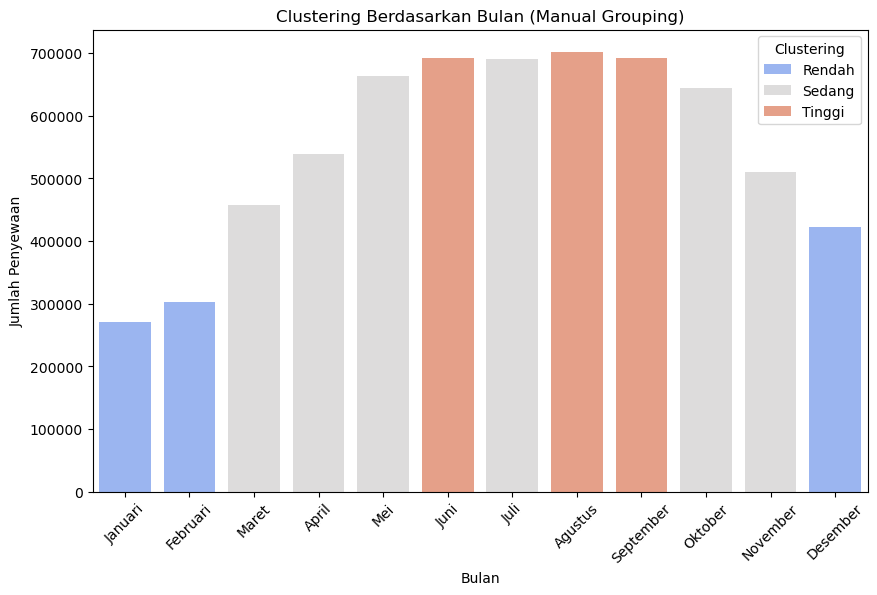

In [49]:
# 1. Clustering Berdasarkan Bulan

# Mapping nama Bulan
month_names={
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}
monthly_rentals['mnth']=monthly_rentals['mnth'].map(month_names)

plt.figure(figsize=(10,6))
sns.barplot(x="mnth", y="cnt", hue="Clustering", data=monthly_rentals, palette="coolwarm")
plt.title('Clustering Berdasarkan Bulan (Manual Grouping)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

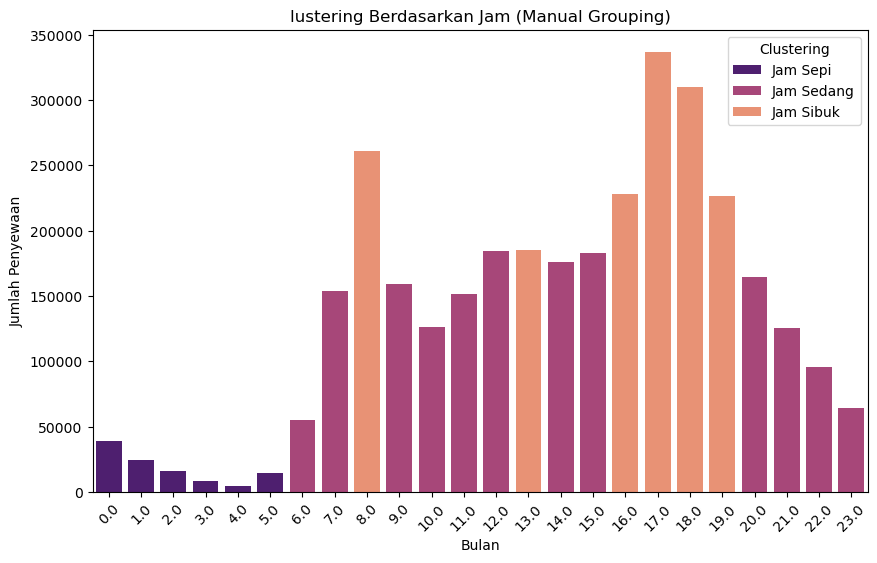

In [53]:
# 2. Clustering Berdasarkan Jam

plt.figure(figsize=(10,6))
sns.barplot(x="hr", y="cnt", hue="Clustering", data=hourly_rentals, palette="magma")
plt.title('lustering Berdasarkan Jam (Manual Grouping)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

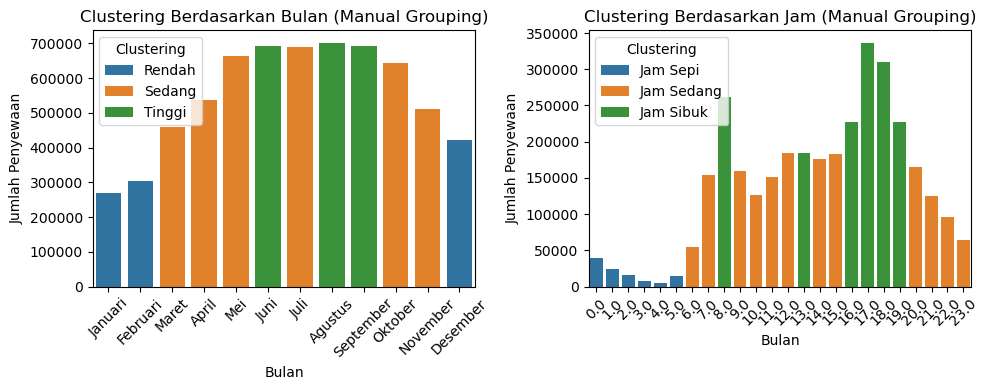

In [57]:
# Analisis Gabungan RFM

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.barplot(x='mnth', y='cnt', hue='Clustering', data=monthly_rentals, ax=axs[0])
axs[0].set_title("Clustering Berdasarkan Bulan (Manual Grouping)")
axs[0].set_xlabel("Bulan")
axs[0].set_ylabel("Jumlah Penyewaan")
axs[0].tick_params(axis='x', rotation=45)

sns.barplot(x="hr", y="cnt", hue='Clustering', data=hourly_rentals, ax=axs[1])
axs[1].set_title("Clustering Berdasarkan Jam (Manual Grouping)")
axs[1].set_xlabel("Bulan")
axs[1].set_ylabel("Jumlah Penyewaan")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [52]:
main_data_df.to_csv("main_data.csv", index=False)

## Conclusion

- Dari hasil analisis yang telah saya lakukan, saya memperoleh kesimpulan bahwa jumlah rental tertinggi dalam setahun berdasarkan perbulan terjadi di bulan ke-8 dan diikuti dengan bulan ke-7,6,9 yang artinya bulan tersebut merupakan pertengahan tahun dengan selisih data yang tidak terlalu tinggi. Sehingga pertengahan bulan menjadi momen dimana rental sepeda memiliki permintaan tertinggi.
- Dari hasil analisis yang telah saya lakukan, saya memperoleh kesimpulan bahwa jumlah rental tertinggi dalam sebulan berdasarkan jam (waktu) terjadi di jam ke-17 diikuti dengan jam ke-18 yang selisihnya tidak terlalu tinggi. Serta diikuti jam ke-5, hal ini menandakan bahwa aktivitas jam ke-17 dan ke-18 merupakan aktivitas pulang kerja, sedangkan jam ke-5 merupakan aktivitas berangkat kerja.